<a href="https://colab.research.google.com/github/lucaspercisi/yelp-fake-reviews-ptbr/blob/main/yelp_graficos_artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd

url_dataset = 'https://raw.githubusercontent.com/lucaspercisi/yelp-fake-reviews-ptbr/main/Datasets/yelp_df_ai_full_dataset.csv'
yelp_df = pd.read_csv(url_dataset)

In [65]:
yelp_df['review_length'] = yelp_df['content'].apply(len)

In [66]:
yelp_df.head()

,content,qtd_friends,qtd_reviews,qtd_photos,rating,user_has_photo,fake_review,review_length
0,Grande variedade de shots de tequillas e mezca...,0,6,0,4,True,True,160
1,Realmente fui cliente várias vezes! E achava o...,1,1,0,1,True,True,268
2,Excelente Marisqueira! Costumo ser cliente hab...,1,3,0,4,True,True,72
3,Um bar temático de videojogos em que o amor pe...,0,1,4,5,True,True,108
4,Tasca moderna com petiscos portugueses com um ...,4,2,3,5,True,True,124


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style="whitegrid")

colunas_numericas = ['qtd_friends', 'qtd_reviews', 'qtd_photos', 'rating']

colunas_categoricas = ['user_has_photo', 'fake_review']

cores = {True: 'orange', False: 'blue'}

titulos_portugues = {
    'qtd_friends': 'Quantidade de Amigos',
    'qtd_reviews': 'Quantidade de Avaliações',
    'qtd_photos': 'Quantidade de Fotos',
    'rating': 'Classificação',
    'review_length': 'Tamanho do Review'
}

legendas_portugues = {True: 'Avaliação Falsa', False: 'Avaliação Verdadeira'}

caminhos_graficos = []

In [68]:
def remover_outliers(df, column, percentage):
    Q3 = df[column].quantile(percentage)
    filter = df[column] <= Q3
    return df.loc[filter]

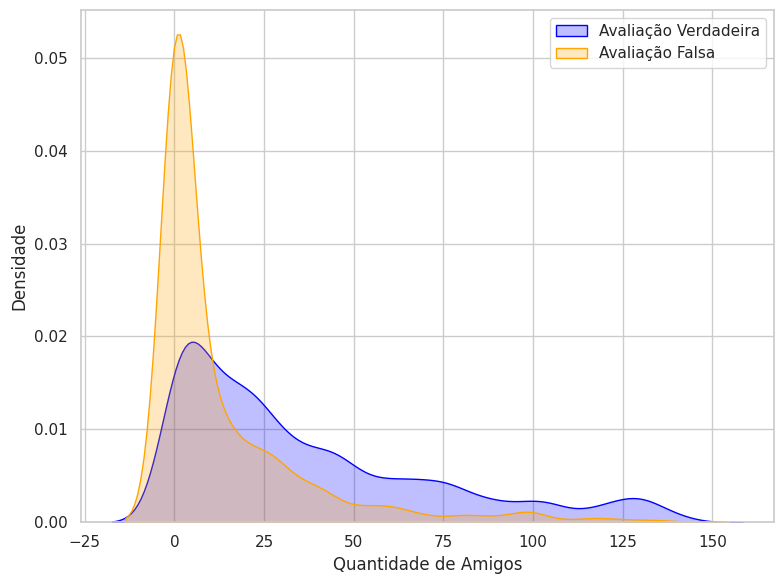

In [69]:
# 1. Histograma para "Quantidade de Amigos" (qtd_friends)

df_filtrado = remover_outliers(yelp_df.copy(), 'qtd_friends', 0.9)

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_filtrado, x='qtd_friends', hue='fake_review', common_norm=False, palette=cores, hue_order=[True, False], fill=True)
plt.xlabel(titulos_portugues['qtd_friends'])
plt.ylabel('Densidade')
plt.legend(title='', labels=[legendas_portugues[False], legendas_portugues[True]])
plt.tight_layout()
caminho = 'histograma_qtd_friends.png'
plt.savefig(caminho)
plt.show()
plt.close()
caminhos_graficos.append(caminho)

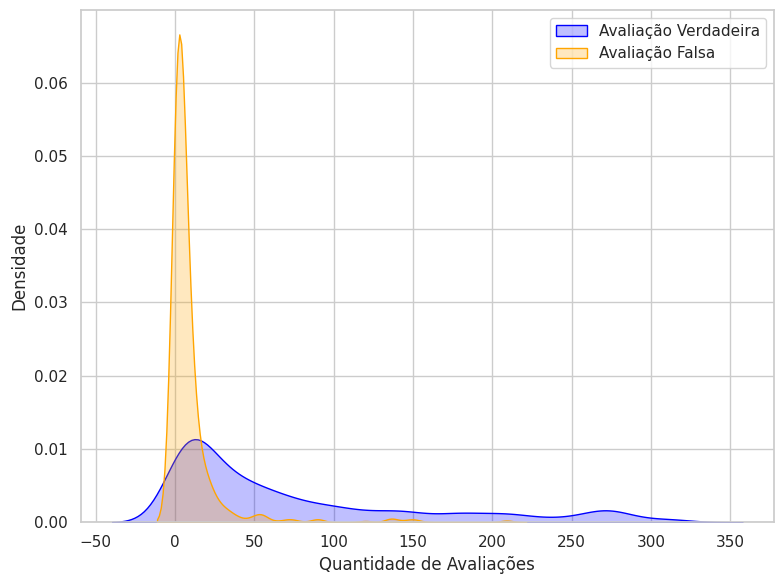

In [70]:
# 2. Histograma para "Quantidade de Avaliações" (qtd_reviews)

df_filtrado = remover_outliers(yelp_df.copy(), 'qtd_reviews', 0.9)

plt.figure(figsize=(8, 6))
sns.kdeplot(df_filtrado, x='qtd_reviews', hue='fake_review', common_norm=False, palette=cores, hue_order=[True, False], fill=True)
plt.xlabel(titulos_portugues['qtd_reviews'])
plt.ylabel('Densidade')
plt.legend(title='', labels=[legendas_portugues[False], legendas_portugues[True]])
plt.tight_layout()
caminho = 'histograma_qtd_reviews.png'
plt.savefig(caminho)
plt.show()
plt.close()
caminhos_graficos.append(caminho)

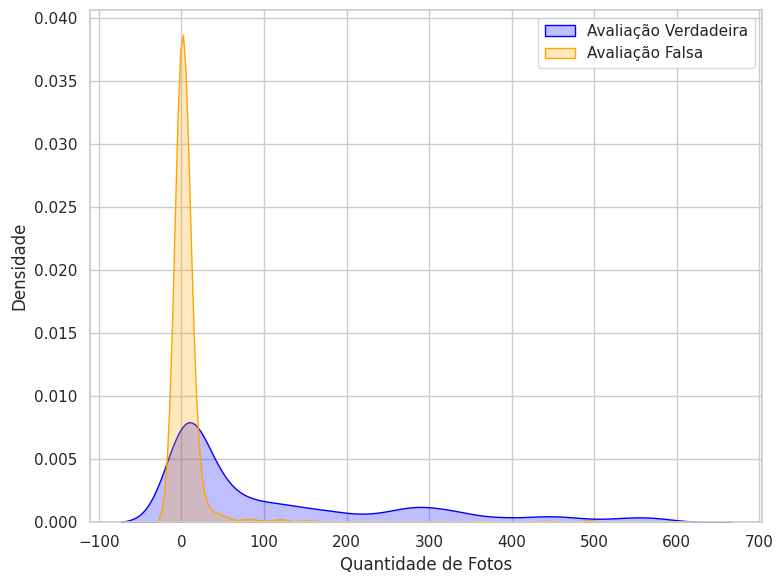

In [71]:
# 3. Histograma para "Quantidade de Fotos" (qtd_photos)

df_filtrado = remover_outliers(yelp_df.copy(), 'qtd_photos', 0.9)

plt.figure(figsize=(8, 6))
sns.kdeplot(df_filtrado, x='qtd_photos', hue='fake_review', common_norm=False, palette=cores, hue_order=[True, False], fill=True)
plt.xlabel(titulos_portugues['qtd_photos'])
plt.ylabel('Densidade')
plt.legend(title='', labels=[legendas_portugues[False], legendas_portugues[True]])
plt.tight_layout()
caminho = 'histograma_qtd_photos.png'
plt.savefig(caminho)
plt.show()
plt.close()
caminhos_graficos.append(caminho)

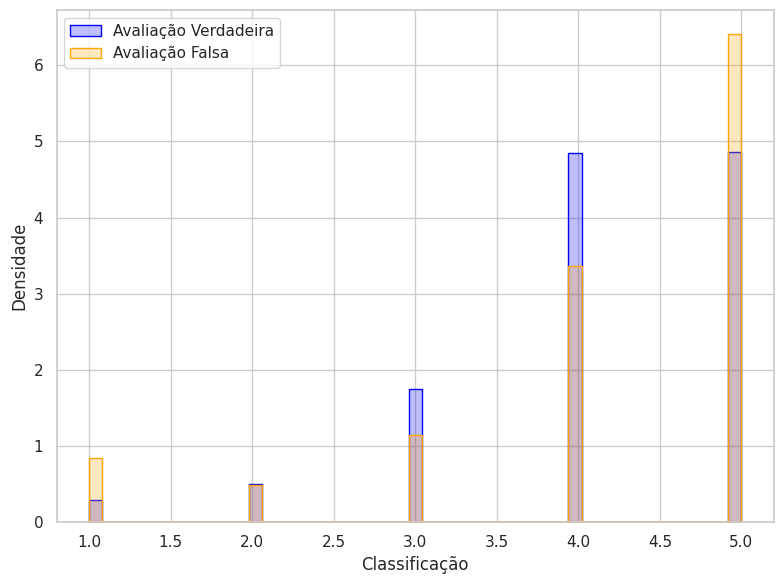

In [72]:
# 4. Histograma para "Classificação" (rating)

plt.figure(figsize=(8, 6))
sns.histplot(yelp_df, x='rating', hue='fake_review', element="step", stat="density", common_norm=False, palette=cores, hue_order=[True, False])
plt.xlabel(titulos_portugues['rating'])
plt.ylabel('Densidade')
plt.legend(title='', labels=[legendas_portugues[False], legendas_portugues[True]], loc='upper left')
plt.tight_layout()
caminho = 'histograma_rating.png'
plt.savefig(caminho)
plt.show()
plt.close()
caminhos_graficos.append(caminho)

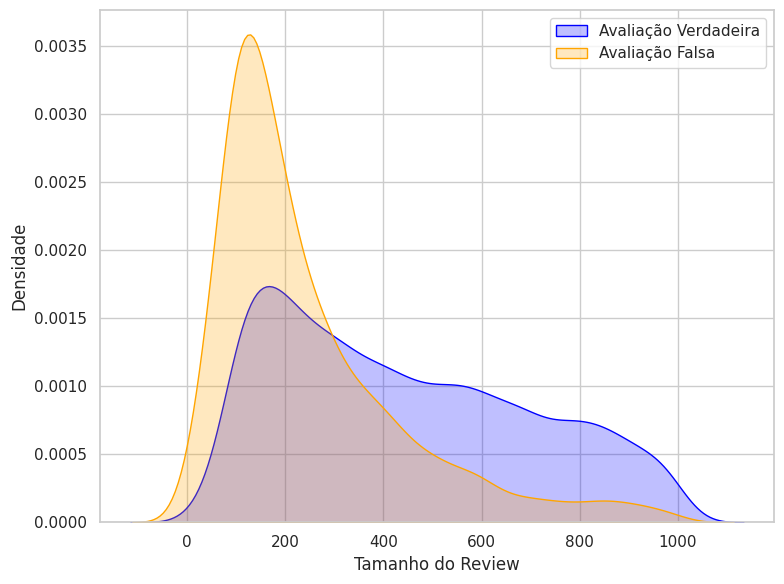

In [73]:
# 5. Histograma para "Tamanho do Review" (review_length)

df_filtrado = remover_outliers(yelp_df.copy(), 'review_length', 0.9)

plt.figure(figsize=(8, 6))
sns.kdeplot(df_filtrado, x='review_length', hue='fake_review', common_norm=False, palette=cores, hue_order=[True, False], fill=True)
plt.xlabel(titulos_portugues['review_length'])
plt.ylabel('Densidade')
plt.legend(title='', labels=[legendas_portugues[False], legendas_portugues[True]])
plt.tight_layout()
caminho = 'histograma_review_length.png'
plt.savefig(caminho)
plt.show()
plt.close()
caminhos_graficos.append(caminho)

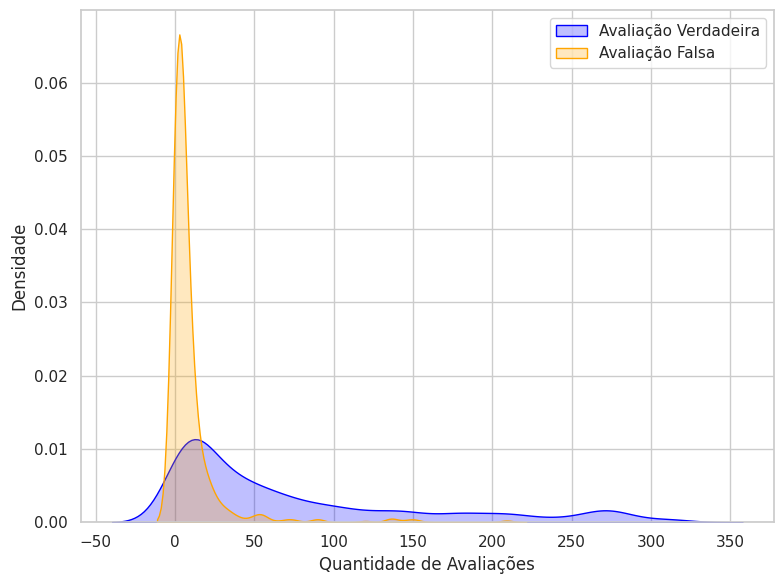

In [74]:
# 6. Gráfico de densidade para "Quantidade de Avaliações" (qtd_reviews)

df_filtrado = remover_outliers(yelp_df.copy(), 'qtd_reviews', 0.9)

plt.figure(figsize=(8, 6))
sns.kdeplot(df_filtrado, x='qtd_reviews', hue='fake_review', common_norm=False, palette=cores, hue_order=[True, False], fill=True)
plt.xlabel(titulos_portugues['qtd_reviews'])
plt.ylabel('Densidade')
plt.legend(title='', labels=[legendas_portugues[False], legendas_portugues[True]])
plt.tight_layout()
caminho = 'histograma_qtd_reviews.png'
plt.savefig(caminho)
plt.show()
plt.close()
caminhos_graficos.append(caminho)

In [75]:
for file in caminhos_graficos:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>